<blockquote>
    <h1>Exercise 4.10</h1>
    <p>This question should be answered using the <code>Weekly</code> data set, which is part of the <code>ISLR</code> package. This data is similar in nature to the <code>Smarket</code> data from this chapter’s lab, except that it contains $1,089$ weekly returns for $21$ years, from the beginning of $1990$ to the end of $2010$.</p>
    <ol>
        <li>Produce some numerical and graphical summaries of the <code>Weekly</code> data. Do there appear to be any patterns?</li>
        <li>Use the full data set to perform a logistic regression with $\mathrm{Direction}$ as the response and the five lag variables plus $\mathrm{Volume}$ as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?</li>
        <li>Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.</li>
        <li>Now fit the logistic regression model using a training data period from $1990$ to $2008$, with $\mathrm{Lag2}$ as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from $2009$ and $2010$).</li>
        <li>Repeat 4 using LDA.</li>
        <li>Repeat 4 using QDA.</li>
        <li>Repeat 4 using KNN with $K = 1$.</li>
        <li>Which of these methods appears to provide the best results on this data?</li>
        <li>Experiment with different combinations of predictors, including possible transformations and interactions, for each of the methods. Report the variables, method, and associated confusion matrix that appears to provide the best results on the held out data. Note that you should also experiment with values for $K$ in the KNN classifier.</li>
    </ol>
</blockquote>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%run ../../customModules/usefulFunctions.ipynb
# https://stackoverflow.com/questions/34398054/ipython-notebook-cell-multiple-outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import statsmodels.api as sm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

<h3>Exercise 4.10.1</h3>
<blockquote>
    <i>Produce some numerical and graphical summaries of the <code>Weekly</code> data. Do there appear to be any patterns?</i>
</blockquote>

<p>These summaries can be found in the <a href="../../DataSets/Weekly/Exploration.ipynb">Exploration</a> notebook. The $\mathrm{Today}$, $\mathrm{Lag1}$, $\mathrm{Lag2}$, $\mathrm{Lag3}$, $\mathrm{Lag4}$ and $\mathrm{Lag5}$ variables have approximately the same summary statistics which makes sense because overall they all have the same values except for the first and last $5$ samples. Let us in addition produce a scatterplot matrix of all of the variables in the data set.</p>

,Year,Today,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Direction
0,1990,-0.270,0.816,1.572,-3.936,-0.229,-3.484,0.154976,Down
1,1990,-2.576,-0.270,0.816,1.572,-3.936,-0.229,0.148574,Down
2,1990,3.514,-2.576,-0.270,0.816,1.572,-3.936,0.159837,Up
3,1990,0.712,3.514,-2.576,-0.270,0.816,1.572,0.161630,Up
4,1990,1.178,0.712,3.514,-2.576,-0.270,0.816,0.153728,Up


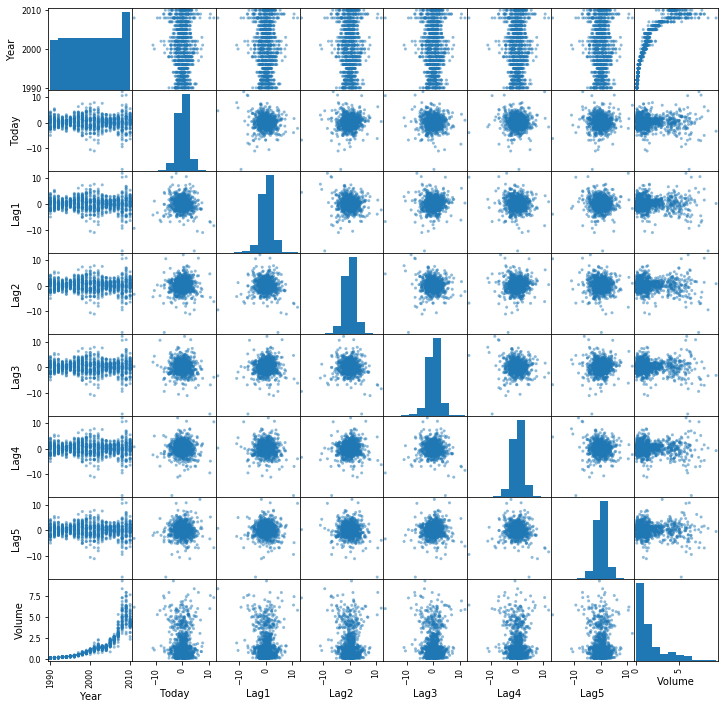

In [2]:
df = pd.read_csv("../../DataSets/Weekly/Weekly.csv")
df = df.reindex(columns=['Year', 'Today', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Direction'])
df.head()
_ = pd.plotting.scatter_matrix(df, figsize=(12, 12))

<p>The only clear pattern is between the $\mathrm{Volumne}$ and $\mathrm{Year}$ variables.</p>

<h3>Exercise 4.10.2</h3>
<blockquote>
    <i>Use the full data set to perform a logistic regression with $\mathrm{Direction}$ as the response and the five lag variables plus $\mathrm{Volume}$ as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?</i>
</blockquote>

In [3]:
df.set_index('Year', inplace=True)
df['Direction'] = np.where(df['Direction'] == 'Up', 1, 0)
df.insert(0, 'Intercept', 1)
targetColumn = ['Direction']
descriptiveColumns = removeColumnsFromList(df, targetColumn + ['Today'])
df_X = df[descriptiveColumns]
df_Y = df[targetColumn]
model = sm.Logit(df_Y, df_X)
fitted = model.fit()
fitted.summary()

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Sun, 12 Jan 2020   Pseudo R-squ.:                0.006580
Time:                        00:53:23   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.026     -1.563      0.118      -0.093       0.010
Lag2           0.0584      0.027      2.175      0.030       0.006       0.111
Lag3          -0.0161      0.027     -0.602      0.547      -0.068       0.036
Lag4          -0.0278      0.026     -1.050      0.294      -0.080       0.024
Lag5          -0.0145      0.026     -0.549      0.583      -0.066       0.037
Volume        -0.0227      0.037     -0.616      0.538      -0.095       0.050
==============================================================================
"""

<p>We see that, with a significance level of $\alpha=10 \%$, the $\mathrm{Lag2}$ is the only variable indicating statistical significance.</p>

<h3>Exercise 4.10.3</h3>
<blockquote>
    <i>Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.</i>
</blockquote>

<p>We use our custom <code>createConfusionMatrixFromLogisticModel</code> method to compute the confusion matrix and its associated percentages.</p>

In [4]:
df_confusion, df_confusion_pct = createConfusionMatrixFromLogisticModel(fitted_model=fitted, binaryMap={0: 'Down', 1: 'Up'})
df_confusion  
df_confusion_pct.round(2)

Predicted     
                   Down   Up
Observed Down        54  430
         Up          48  557

Predicted (%)       
                           Down     Up
Observed (%) Down         11.16  88.84
             Up            7.93  92.07

<p>This immediately suggests that the model is better at predicting the $\mathrm{Up}$ direction than it is at preciting the $\mathrm{Down}$ direction. That is because the model predicts $\mathrm{Up}$ a lot more than $\mathrm{Down}$. To be precise, $(430 + 557)/(430 + 557 + 54 + 48) = 90.63 \%$ of the total predictions are $\mathrm{Up}$. Furthermore, let us calculate classification accuracy
$$
\mathrm{classification \,\, rate} = \frac{\mathrm{TP} + \mathrm{TN}}{\mathrm{TP} + \mathrm{TN} + \mathrm{FP} + \mathrm{FN}} = 56.11 \% \,,
$$
where $\mathrm{TN}$, $\mathrm{FP}$, $\mathrm{FN}$ and $\mathrm{TP}$ denotes the true negative, false positive, false negative and true positive, respectively.</p>

<h3>Exercise 4.10.4</h3>
<blockquote>
    <i>Now fit the logistic regression model using a training data period from $1990$ to $2008$, with $\mathrm{Lag2}$ as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from $2009$ and $2010$).</i>
</blockquote>

In [5]:
targetColumn = ['Direction']
descriptiveColumns = ['Intercept', 'Lag2']
df_X_train = df[descriptiveColumns].loc[1990:2008]
df_Y_train = df[targetColumn].loc[1990:2008]
df_X_test = df[descriptiveColumns].loc[2009:2010]
df_Y_test = df[targetColumn].loc[2009:2010]

model = sm.Logit(df_Y_train, df_X_train)
fitted = model.fit()
fitted.summary()

Optimization terminated successfully.
         Current function value: 0.685555
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                  985
Model:                          Logit   Df Residuals:                      983
Method:                           MLE   Df Model:                            1
Date:                Sun, 12 Jan 2020   Pseudo R-squ.:                0.003076
Time:                        00:53:23   Log-Likelihood:                -675.27
converged:                       True   LL-Null:                       -677.35
Covariance Type:            nonrobust   LLR p-value:                   0.04123
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2033      0.064      3.162      0.002       0.077       0.329
Lag2           0.0581      0.029      2.024      0.043       0.002       0.114
==============================================================================
"""

In [6]:
sr_Y_pred = fitted.predict(df_X_test)
df_Y_test_and_pred = pd.DataFrame({
    'Observed': df_Y_test['Direction'],
    'Predicted': np.where(sr_Y_pred > 0.5, 1, 0),
})
df_confusion, df_confusion_pct = createConfusionMatrixFromOutOfSampleData(df=df_Y_test_and_pred, binaryMap={0: 'Down', 1: 'Up'})
df_confusion  
df_confusion_pct.round(2)

Predicted    
                   Down  Up
Observed Down         9  34
         Up           5  56

Predicted (%)       
                           Down     Up
Observed (%) Down         20.93  79.07
             Up            8.20  91.80

<p>The classification accuracy is $62.5 \%$.</p>

<h3>Exercise 4.10.5</h3>
<blockquote>
    <i>Repeat 4 using LDA.</i>
</blockquote>

In [7]:
targetColumn = ['Direction']
descriptiveColumns = ['Lag2']
X_train = np.squeeze(df[descriptiveColumns].loc[1990:2008].to_numpy()).reshape(-1, 1)
Y_train = np.squeeze(df[targetColumn].loc[1990:2008].to_numpy())
X_test = df[descriptiveColumns].loc[2009:2010].to_numpy()

model = LinearDiscriminantAnalysis()
_ = model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

df_Y_test_and_pred = pd.DataFrame({
    'Observed': df_Y_test['Direction'],
    'Predicted': Y_pred,
})
df_confusion, df_confusion_pct = createConfusionMatrixFromOutOfSampleData(df=df_Y_test_and_pred, binaryMap={0: 'Down', 1: 'Up'})
df_confusion  
df_confusion_pct.round(2)

Predicted    
                   Down  Up
Observed Down         9  34
         Up           5  56

Predicted (%)       
                           Down     Up
Observed (%) Down         20.93  79.07
             Up            8.20  91.80

<p>These confusion matrices are exactly the same as the logistic regression has yielded in subquestion 4.10.4, and so the classification accuracy is again $62.5 \%$.</p>

<h3>Exercise 4.10.6</h3>
<blockquote>
    <i>Repeat 4 using QDA.</i>
</blockquote>

In [8]:
model = QuadraticDiscriminantAnalysis()
_ = model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

df_Y_test_and_pred = pd.DataFrame({
    'Observed': df_Y_test['Direction'],
    'Predicted': Y_pred,
})
df_confusion, df_confusion_pct = createConfusionMatrixFromOutOfSampleData(df=df_Y_test_and_pred, binaryMap={0: 'Down', 1: 'Up'})
df_confusion  
df_confusion_pct.round(2)

Predicted    
                   Down  Up
Observed Down         0  43
         Up           0  61

Predicted (%)       
                           Down     Up
Observed (%) Down           0.0  100.0
             Up             0.0  100.0

<p>This model predicts every observation to be $\mathrm{Up}$. The classification accuracy is $58.65 \%$.</p>

<h3>Exercise 4.10.7</h3>
<blockquote>
    <i>Repeat 4 using KNN with $K = 1$.</i>
</blockquote>

In [9]:
model = KNeighborsClassifier(n_neighbors=1)
_ = model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

df_Y_test_and_pred = pd.DataFrame({
    'Observed': df_Y_test['Direction'],
    'Predicted': Y_pred,
})
df_confusion, df_confusion_pct = createConfusionMatrixFromOutOfSampleData(df=df_Y_test_and_pred, binaryMap={0: 'Down', 1: 'Up'})
df_confusion  
df_confusion_pct.round(2)

Predicted    
                   Down  Up
Observed Down        21  22
         Up          31  30

Predicted (%)       
                           Down     Up
Observed (%) Down         48.84  51.16
             Up           50.82  49.18

<p>The classification accuracy is $49.04 \%$.</p>

<h3>Exercise 4.10.8</h3>
<blockquote>
    <i>Which of these methods appears to provide the best results on this data?</i>
</blockquote>

<p>Based on the classification accuracy of each of these model, the logistic regression and LDA methods have the best predictive power.</p>

<h3>Exercise 4.10.9</h3>
<blockquote>
    <i>Experiment with different combinations of predictors, including possible transformations and interactions, for each of the methods. Report the variables, method, and associated confusion matrix that appears to provide the best results on the held out data. Note that you should also experiment with values for $K$ in the KNN classifier.</i>
</blockquote>

In [10]:
targetColumn = ['Direction']
descriptiveColumns = ['Volume', 'Lag1']
df_X_train = df[descriptiveColumns].loc[1990:2008]
df_Y_train = df[targetColumn].loc[1990:2008]
df_X_test = df[descriptiveColumns].loc[2009:2010]
df_Y_test = df[targetColumn].loc[2009:2010]

model = sm.Logit(df_Y_train, df_X_train)
fitted = model.fit()
fitted.summary()

sr_Y_pred = fitted.predict(df_X_test)
df_Y_test_and_pred = pd.DataFrame({
    'Observed': df_Y_test['Direction'],
    'Predicted': np.where(sr_Y_pred > 0.5, 1, 0),
})
df_confusion, df_confusion_pct = createConfusionMatrixFromOutOfSampleData(df=df_Y_test_and_pred, binaryMap={0: 'Down', 1: 'Up'})
df_confusion  
df_confusion_pct.round(2)

confusion_matrix = df_confusion.to_numpy()
TN, FP, FN, TP = confusion_matrix[0, 0], confusion_matrix[0, 1], confusion_matrix[1, 0], confusion_matrix[1, 1]
class_acc = 100 * ((TP + TN) / (TN + FP + FN + TP))
f'The classification accuracy is {class_acc:.2f}%.'

Optimization terminated successfully.
         Current function value: 0.690634
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                  985
Model:                          Logit   Df Residuals:                      983
Method:                           MLE   Df Model:                            1
Date:                Sun, 12 Jan 2020   Pseudo R-squ.:               -0.004311
Time:                        00:53:23   Log-Likelihood:                -680.27
converged:                       True   LL-Null:                       -677.35
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Volume         0.0448      0.037      1.209      0.227      -0.028       0.117
Lag1          -0.0516      0.029     -1.799      0.072      -0.108       0.005
==============================================================================
"""

Predicted    
                   Down  Up
Observed Down         2  41
         Up           5  56

Predicted (%)       
                           Down     Up
Observed (%) Down          4.65  95.35
             Up            8.20  91.80

'The classification accuracy is 55.77%.'

In [11]:
targetColumn = ['Direction']
descriptiveColumns = ['Volume', 'Lag2']
df_X_train = df[descriptiveColumns].loc[1990:2008]
df_Y_train = df[targetColumn].loc[1990:2008]
df_X_test = df[descriptiveColumns].loc[2009:2010]
df_Y_test = df[targetColumn].loc[2009:2010]

model = sm.Logit(df_Y_train, df_X_train)
fitted = model.fit()
fitted.summary()

sr_Y_pred = fitted.predict(df_X_test)
df_Y_test_and_pred = pd.DataFrame({
    'Observed': df_Y_test['Direction'],
    'Predicted': np.where(sr_Y_pred > 0.5, 1, 0),
})
df_confusion, df_confusion_pct = createConfusionMatrixFromOutOfSampleData(df=df_Y_test_and_pred, binaryMap={0: 'Down', 1: 'Up'})
df_confusion  
df_confusion_pct.round(2)

confusion_matrix = df_confusion.to_numpy()
TN, FP, FN, TP = confusion_matrix[0, 0], confusion_matrix[0, 1], confusion_matrix[1, 0], confusion_matrix[1, 1]
class_acc = 100 * ((TP + TN) / (TN + FP + FN + TP))
f'The classification accuracy is {class_acc:.2f}%.'

Optimization terminated successfully.
         Current function value: 0.689583
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                  985
Model:                          Logit   Df Residuals:                      983
Method:                           MLE   Df Model:                            1
Date:                Sun, 12 Jan 2020   Pseudo R-squ.:               -0.002782
Time:                        00:53:24   Log-Likelihood:                -679.24
converged:                       True   LL-Null:                       -677.35
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Volume         0.0537      0.037      1.450      0.147      -0.019       0.126
Lag2           0.0659      0.029      2.292      0.022       0.010       0.122
==============================================================================
"""

Predicted    
                   Down  Up
Observed Down         4  39
         Up           1  60

Predicted (%)       
                           Down     Up
Observed (%) Down          9.30  90.70
             Up            1.64  98.36

'The classification accuracy is 61.54%.'

In [12]:
descriptiveColumns = ['Volume', 'Lag1', 'Lag2']
df_X_train = df[descriptiveColumns].loc[1990:2008]
df_Y_train = df[targetColumn].loc[1990:2008]
df_X_test = df[descriptiveColumns].loc[2009:2010]
df_Y_test = df[targetColumn].loc[2009:2010]

model = sm.Logit(df_Y_train, df_X_train)
fitted = model.fit()
fitted.summary()

sr_Y_pred = fitted.predict(df_X_test)
df_Y_test_and_pred = pd.DataFrame({
    'Observed': df_Y_test['Direction'],
    'Predicted': np.where(sr_Y_pred > 0.5, 1, 0),
})
df_confusion, df_confusion_pct = createConfusionMatrixFromOutOfSampleData(df=df_Y_test_and_pred, binaryMap={0: 'Down', 1: 'Up'})
df_confusion  
df_confusion_pct.round(2)

confusion_matrix = df_confusion.to_numpy()
TN, FP, FN, TP = confusion_matrix[0, 0], confusion_matrix[0, 1], confusion_matrix[1, 0], confusion_matrix[1, 1]
class_acc = 100 * ((TP + TN) / (TN + FP + FN + TP))
f'The classification accuracy is {class_acc:.2f}%.'

Optimization terminated successfully.
         Current function value: 0.688252
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                  985
Model:                          Logit   Df Residuals:                      982
Method:                           MLE   Df Model:                            2
Date:                Sun, 12 Jan 2020   Pseudo R-squ.:              -0.0008463
Time:                        00:53:24   Log-Likelihood:                -677.93
converged:                       True   LL-Null:                       -677.35
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Volume         0.0506      0.037      1.357      0.175      -0.022       0.124
Lag1          -0.0462      0.029     -1.609      0.108      -0.102       0.010
Lag2           0.0623      0.029      2.146      0.032       0.005       0.119
==============================================================================
"""

Predicted    
                   Down  Up
Observed Down         5  38
         Up           6  55

Predicted (%)       
                           Down     Up
Observed (%) Down         11.63  88.37
             Up            9.84  90.16

'The classification accuracy is 57.69%.'

In [13]:
df['Lag1*Lag2'] = df['Lag1']*df['Lag2']
descriptiveColumns = ['Volume', 'Lag1', 'Lag2', 'Lag1*Lag2']
df_X_train = df[descriptiveColumns].loc[1990:2008]
df_Y_train = df[targetColumn].loc[1990:2008]
df_X_test = df[descriptiveColumns].loc[2009:2010]
df_Y_test = df[targetColumn].loc[2009:2010]

model = sm.Logit(df_Y_train, df_X_train)
fitted = model.fit()
fitted.summary()

sr_Y_pred = fitted.predict(df_X_test)
df_Y_test_and_pred = pd.DataFrame({
    'Observed': df_Y_test['Direction'],
    'Predicted': np.where(sr_Y_pred > 0.5, 1, 0),
})
df_confusion, df_confusion_pct = createConfusionMatrixFromOutOfSampleData(df=df_Y_test_and_pred, binaryMap={0: 'Down', 1: 'Up'})
df_confusion  
df_confusion_pct.round(2)

confusion_matrix = df_confusion.to_numpy()
TN, FP, FN, TP = confusion_matrix[0, 0], confusion_matrix[0, 1], confusion_matrix[1, 0], confusion_matrix[1, 1]
class_acc = 100 * ((TP + TN) / (TN + FP + FN + TP))
f'The classification accuracy is {class_acc:.2f}%.'

Optimization terminated successfully.
         Current function value: 0.688224
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                  985
Model:                          Logit   Df Residuals:                      981
Method:                           MLE   Df Model:                            3
Date:                Sun, 12 Jan 2020   Pseudo R-squ.:              -0.0008065
Time:                        00:53:24   Log-Likelihood:                -677.90
converged:                       True   LL-Null:                       -677.35
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Volume         0.0509      0.037      1.362      0.173      -0.022       0.124
Lag1          -0.0437      0.031     -1.433      0.152      -0.104       0.016
Lag2           0.0620      0.029      2.128      0.033       0.005       0.119
Lag1*Lag2      0.0017      0.007      0.231      0.818      -0.013       0.016
==============================================================================
"""

Predicted    
                   Down  Up
Observed Down         5  38
         Up           6  55

Predicted (%)       
                           Down     Up
Observed (%) Down         11.63  88.37
             Up            9.84  90.16

'The classification accuracy is 57.69%.'

In [14]:
df['Volume*Lag1'] = df['Volume']*df['Lag1']
descriptiveColumns = ['Volume', 'Lag1', 'Lag2', 'Volume*Lag1']
df_X_train = df[descriptiveColumns].loc[1990:2008]
df_Y_train = df[targetColumn].loc[1990:2008]
df_X_test = df[descriptiveColumns].loc[2009:2010]
df_Y_test = df[targetColumn].loc[2009:2010]

model = sm.Logit(df_Y_train, df_X_train)
fitted = model.fit()
fitted.summary()

sr_Y_pred = fitted.predict(df_X_test)
df_Y_test_and_pred = pd.DataFrame({
    'Observed': df_Y_test['Direction'],
    'Predicted': np.where(sr_Y_pred > 0.5, 1, 0),
})
df_confusion, df_confusion_pct = createConfusionMatrixFromOutOfSampleData(df=df_Y_test_and_pred, binaryMap={0: 'Down', 1: 'Up'})
df_confusion  
df_confusion_pct.round(2)

confusion_matrix = df_confusion.to_numpy()
TN, FP, FN, TP = confusion_matrix[0, 0], confusion_matrix[0, 1], confusion_matrix[1, 0], confusion_matrix[1, 1]
class_acc = 100 * ((TP + TN) / (TN + FP + FN + TP))
f'The classification accuracy is {class_acc:.2f}%.'

Optimization terminated successfully.
         Current function value: 0.687712
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                  985
Model:                          Logit   Df Residuals:                      981
Method:                           MLE   Df Model:                            3
Date:                Sun, 12 Jan 2020   Pseudo R-squ.:              -6.141e-05
Time:                        00:53:24   Log-Likelihood:                -677.40
converged:                       True   LL-Null:                       -677.35
Covariance Type:            nonrobust   LLR p-value:                     1.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Volume          0.0450      0.038      1.180      0.238      -0.030       0.120
Lag1           -0.0173      0.040     -0.429      0.668      -0.096       0.062
Lag2            0.0628      0.029      2.132      0.033       0.005       0.121
Volume*Lag1    -0.0140      0.015     -0.957      0.339      -0.043       0.015
===============================================================================
"""

Predicted    
                   Down  Up
Observed Down        11  32
         Up          13  48

Predicted (%)       
                           Down     Up
Observed (%) Down         25.58  74.42
             Up           21.31  78.69

'The classification accuracy is 56.73%.'

In [15]:
targetColumn = ['Direction']
descriptiveColumns = ['Volume', 'Lag1']
X_train = df[descriptiveColumns].loc[1990:2008].to_numpy()
Y_train = np.squeeze(df[targetColumn].loc[1990:2008].to_numpy())
X_test = df[descriptiveColumns].loc[2009:2010].to_numpy()

model = LinearDiscriminantAnalysis()
_ = model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

df_Y_test_and_pred = pd.DataFrame({
    'Observed': df_Y_test['Direction'],
    'Predicted': Y_pred,
})
df_confusion, df_confusion_pct = createConfusionMatrixFromOutOfSampleData(df=df_Y_test_and_pred, binaryMap={0: 'Down', 1: 'Up'})
df_confusion  
df_confusion_pct.round(2)

confusion_matrix = df_confusion.to_numpy()
TN, FP, FN, TP = confusion_matrix[0, 0], confusion_matrix[0, 1], confusion_matrix[1, 0], confusion_matrix[1, 1]
class_acc = 100 * ((TP + TN) / (TN + FP + FN + TP))
f'The classification accuracy is {class_acc:.2f}%.'

'-------------------'

model = QuadraticDiscriminantAnalysis()
_ = model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

df_Y_test_and_pred = pd.DataFrame({
    'Observed': df_Y_test['Direction'],
    'Predicted': Y_pred,
})
df_confusion, df_confusion_pct = createConfusionMatrixFromOutOfSampleData(df=df_Y_test_and_pred, binaryMap={0: 'Down', 1: 'Up'})
df_confusion  
df_confusion_pct.round(2)

confusion_matrix = df_confusion.to_numpy()
TN, FP, FN, TP = confusion_matrix[0, 0], confusion_matrix[0, 1], confusion_matrix[1, 0], confusion_matrix[1, 1]
class_acc = 100 * ((TP + TN) / (TN + FP + FN + TP))
f'The classification accuracy is {class_acc:.2f}%.'

'-------------------'

model = KNeighborsClassifier(n_neighbors=1)
_ = model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

df_Y_test_and_pred = pd.DataFrame({
    'Observed': df_Y_test['Direction'],
    'Predicted': Y_pred,
})
df_confusion, df_confusion_pct = createConfusionMatrixFromOutOfSampleData(df=df_Y_test_and_pred, binaryMap={0: 'Down', 1: 'Up'})
df_confusion  
df_confusion_pct.round(2)

confusion_matrix = df_confusion.to_numpy()
TN, FP, FN, TP = confusion_matrix[0, 0], confusion_matrix[0, 1], confusion_matrix[1, 0], confusion_matrix[1, 1]
class_acc = 100 * ((TP + TN) / (TN + FP + FN + TP))
f'The classification accuracy is {class_acc:.2f}%.'

'-------------------'

model = KNeighborsClassifier(n_neighbors=2)
_ = model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

df_Y_test_and_pred = pd.DataFrame({
    'Observed': df_Y_test['Direction'],
    'Predicted': Y_pred,
})
df_confusion, df_confusion_pct = createConfusionMatrixFromOutOfSampleData(df=df_Y_test_and_pred, binaryMap={0: 'Down', 1: 'Up'})
df_confusion  
df_confusion_pct.round(2)

confusion_matrix = df_confusion.to_numpy()
TN, FP, FN, TP = confusion_matrix[0, 0], confusion_matrix[0, 1], confusion_matrix[1, 0], confusion_matrix[1, 1]
class_acc = 100 * ((TP + TN) / (TN + FP + FN + TP))
f'The classification accuracy is {class_acc:.2f}%.'

'-------------------'

model = KNeighborsClassifier(n_neighbors=3)
_ = model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

df_Y_test_and_pred = pd.DataFrame({
    'Observed': df_Y_test['Direction'],
    'Predicted': Y_pred,
})
df_confusion, df_confusion_pct = createConfusionMatrixFromOutOfSampleData(df=df_Y_test_and_pred, binaryMap={0: 'Down', 1: 'Up'})
df_confusion  
df_confusion_pct.round(2)

confusion_matrix = df_confusion.to_numpy()
TN, FP, FN, TP = confusion_matrix[0, 0], confusion_matrix[0, 1], confusion_matrix[1, 0], confusion_matrix[1, 1]
class_acc = 100 * ((TP + TN) / (TN + FP + FN + TP))
f'The classification accuracy is {class_acc:.2f}%.'

Predicted    
                   Down  Up
Observed Down        31  12
         Up          44  17

Predicted (%)       
                           Down     Up
Observed (%) Down         72.09  27.91
             Up           72.13  27.87

'The classification accuracy is 46.15%.'

'-------------------'

Predicted   
                   Down Up
Observed Down        35  8
         Up          53  8

Predicted (%)       
                           Down     Up
Observed (%) Down         81.40  18.60
             Up           86.89  13.11

'The classification accuracy is 41.35%.'

'-------------------'

Predicted    
                   Down  Up
Observed Down        28  15
         Up          34  27

Predicted (%)       
                           Down     Up
Observed (%) Down         65.12  34.88
             Up           55.74  44.26

'The classification accuracy is 52.88%.'

'-------------------'

Predicted    
                   Down  Up
Observed Down        31  12
         Up          47  14

Predicted (%)       
                           Down     Up
Observed (%) Down         72.09  27.91
             Up           77.05  22.95

'The classification accuracy is 43.27%.'

'-------------------'

Predicted    
                   Down  Up
Observed Down        26  17
         Up          40  21

Predicted (%)       
                           Down     Up
Observed (%) Down         60.47  39.53
             Up           65.57  34.43

'The classification accuracy is 45.19%.'

In [16]:
targetColumn = ['Direction']
descriptiveColumns = ['Volume', 'Lag2']
X_train = df[descriptiveColumns].loc[1990:2008].to_numpy()
Y_train = np.squeeze(df[targetColumn].loc[1990:2008].to_numpy())
X_test = df[descriptiveColumns].loc[2009:2010].to_numpy()

model = LinearDiscriminantAnalysis()
_ = model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

df_Y_test_and_pred = pd.DataFrame({
    'Observed': df_Y_test['Direction'],
    'Predicted': Y_pred,
})
df_confusion, df_confusion_pct = createConfusionMatrixFromOutOfSampleData(df=df_Y_test_and_pred, binaryMap={0: 'Down', 1: 'Up'})
df_confusion  
df_confusion_pct.round(2)

confusion_matrix = df_confusion.to_numpy()
TN, FP, FN, TP = confusion_matrix[0, 0], confusion_matrix[0, 1], confusion_matrix[1, 0], confusion_matrix[1, 1]
class_acc = 100 * ((TP + TN) / (TN + FP + FN + TP))
f'The classification accuracy is {class_acc:.2f}%.'

'-------------------'

model = QuadraticDiscriminantAnalysis()
_ = model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

df_Y_test_and_pred = pd.DataFrame({
    'Observed': df_Y_test['Direction'],
    'Predicted': Y_pred,
})
df_confusion, df_confusion_pct = createConfusionMatrixFromOutOfSampleData(df=df_Y_test_and_pred, binaryMap={0: 'Down', 1: 'Up'})
df_confusion  
df_confusion_pct.round(2)

confusion_matrix = df_confusion.to_numpy()
TN, FP, FN, TP = confusion_matrix[0, 0], confusion_matrix[0, 1], confusion_matrix[1, 0], confusion_matrix[1, 1]
class_acc = 100 * ((TP + TN) / (TN + FP + FN + TP))
f'The classification accuracy is {class_acc:.2f}%.'

'-------------------'

model = KNeighborsClassifier(n_neighbors=1)
_ = model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

df_Y_test_and_pred = pd.DataFrame({
    'Observed': df_Y_test['Direction'],
    'Predicted': Y_pred,
})
df_confusion, df_confusion_pct = createConfusionMatrixFromOutOfSampleData(df=df_Y_test_and_pred, binaryMap={0: 'Down', 1: 'Up'})
df_confusion  
df_confusion_pct.round(2)

confusion_matrix = df_confusion.to_numpy()
TN, FP, FN, TP = confusion_matrix[0, 0], confusion_matrix[0, 1], confusion_matrix[1, 0], confusion_matrix[1, 1]
class_acc = 100 * ((TP + TN) / (TN + FP + FN + TP))
f'The classification accuracy is {class_acc:.2f}%.'

'-------------------'

model = KNeighborsClassifier(n_neighbors=2)
_ = model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

df_Y_test_and_pred = pd.DataFrame({
    'Observed': df_Y_test['Direction'],
    'Predicted': Y_pred,
})
df_confusion, df_confusion_pct = createConfusionMatrixFromOutOfSampleData(df=df_Y_test_and_pred, binaryMap={0: 'Down', 1: 'Up'})
df_confusion  
df_confusion_pct.round(2)

confusion_matrix = df_confusion.to_numpy()
TN, FP, FN, TP = confusion_matrix[0, 0], confusion_matrix[0, 1], confusion_matrix[1, 0], confusion_matrix[1, 1]
class_acc = 100 * ((TP + TN) / (TN + FP + FN + TP))
f'The classification accuracy is {class_acc:.2f}%.'

'-------------------'

model = KNeighborsClassifier(n_neighbors=3)
_ = model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

df_Y_test_and_pred = pd.DataFrame({
    'Observed': df_Y_test['Direction'],
    'Predicted': Y_pred,
})
df_confusion, df_confusion_pct = createConfusionMatrixFromOutOfSampleData(df=df_Y_test_and_pred, binaryMap={0: 'Down', 1: 'Up'})
df_confusion  
df_confusion_pct.round(2)

confusion_matrix = df_confusion.to_numpy()
TN, FP, FN, TP = confusion_matrix[0, 0], confusion_matrix[0, 1], confusion_matrix[1, 0], confusion_matrix[1, 1]
class_acc = 100 * ((TP + TN) / (TN + FP + FN + TP))
f'The classification accuracy is {class_acc:.2f}%.'

Predicted    
                   Down  Up
Observed Down        20  23
         Up          25  36

Predicted (%)       
                           Down     Up
Observed (%) Down         46.51  53.49
             Up           40.98  59.02

'The classification accuracy is 53.85%.'

'-------------------'

Predicted    
                   Down  Up
Observed Down        32  11
         Up          44  17

Predicted (%)       
                           Down     Up
Observed (%) Down         74.42  25.58
             Up           72.13  27.87

'The classification accuracy is 47.12%.'

'-------------------'

Predicted    
                   Down  Up
Observed Down        26  17
         Up          29  32

Predicted (%)       
                           Down     Up
Observed (%) Down         60.47  39.53
             Up           47.54  52.46

'The classification accuracy is 55.77%.'

'-------------------'

Predicted    
                   Down  Up
Observed Down        37   6
         Up          50  11

Predicted (%)       
                           Down     Up
Observed (%) Down         86.05  13.95
             Up           81.97  18.03

'The classification accuracy is 46.15%.'

'-------------------'

Predicted    
                   Down  Up
Observed Down        30  13
         Up          34  27

Predicted (%)       
                           Down     Up
Observed (%) Down         69.77  30.23
             Up           55.74  44.26

'The classification accuracy is 54.81%.'

In [17]:
targetColumn = ['Direction']
descriptiveColumns = ['Volume', 'Lag1', 'Lag2']
X_train = df[descriptiveColumns].loc[1990:2008].to_numpy()
Y_train = np.squeeze(df[targetColumn].loc[1990:2008].to_numpy())
X_test = df[descriptiveColumns].loc[2009:2010].to_numpy()

model = LinearDiscriminantAnalysis()
_ = model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

df_Y_test_and_pred = pd.DataFrame({
    'Observed': df_Y_test['Direction'],
    'Predicted': Y_pred,
})
df_confusion, df_confusion_pct = createConfusionMatrixFromOutOfSampleData(df=df_Y_test_and_pred, binaryMap={0: 'Down', 1: 'Up'})
df_confusion  
df_confusion_pct.round(2)

confusion_matrix = df_confusion.to_numpy()
TN, FP, FN, TP = confusion_matrix[0, 0], confusion_matrix[0, 1], confusion_matrix[1, 0], confusion_matrix[1, 1]
class_acc = 100 * ((TP + TN) / (TN + FP + FN + TP))
f'The classification accuracy is {class_acc:.2f}%.'

'-------------------'

model = QuadraticDiscriminantAnalysis()
_ = model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

df_Y_test_and_pred = pd.DataFrame({
    'Observed': df_Y_test['Direction'],
    'Predicted': Y_pred,
})
df_confusion, df_confusion_pct = createConfusionMatrixFromOutOfSampleData(df=df_Y_test_and_pred, binaryMap={0: 'Down', 1: 'Up'})
df_confusion  
df_confusion_pct.round(2)

confusion_matrix = df_confusion.to_numpy()
TN, FP, FN, TP = confusion_matrix[0, 0], confusion_matrix[0, 1], confusion_matrix[1, 0], confusion_matrix[1, 1]
class_acc = 100 * ((TP + TN) / (TN + FP + FN + TP))
f'The classification accuracy is {class_acc:.2f}%.'

'-------------------'

model = KNeighborsClassifier(n_neighbors=1)
_ = model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

df_Y_test_and_pred = pd.DataFrame({
    'Observed': df_Y_test['Direction'],
    'Predicted': Y_pred,
})
df_confusion, df_confusion_pct = createConfusionMatrixFromOutOfSampleData(df=df_Y_test_and_pred, binaryMap={0: 'Down', 1: 'Up'})
df_confusion  
df_confusion_pct.round(2)

confusion_matrix = df_confusion.to_numpy()
TN, FP, FN, TP = confusion_matrix[0, 0], confusion_matrix[0, 1], confusion_matrix[1, 0], confusion_matrix[1, 1]
class_acc = 100 * ((TP + TN) / (TN + FP + FN + TP))
f'The classification accuracy is {class_acc:.2f}%.'

'-------------------'

model = KNeighborsClassifier(n_neighbors=2)
_ = model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

df_Y_test_and_pred = pd.DataFrame({
    'Observed': df_Y_test['Direction'],
    'Predicted': Y_pred,
})
df_confusion, df_confusion_pct = createConfusionMatrixFromOutOfSampleData(df=df_Y_test_and_pred, binaryMap={0: 'Down', 1: 'Up'})
df_confusion  
df_confusion_pct.round(2)

confusion_matrix = df_confusion.to_numpy()
TN, FP, FN, TP = confusion_matrix[0, 0], confusion_matrix[0, 1], confusion_matrix[1, 0], confusion_matrix[1, 1]
class_acc = 100 * ((TP + TN) / (TN + FP + FN + TP))
f'The classification accuracy is {class_acc:.2f}%.'

'-------------------'

model = KNeighborsClassifier(n_neighbors=3)
_ = model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

df_Y_test_and_pred = pd.DataFrame({
    'Observed': df_Y_test['Direction'],
    'Predicted': Y_pred,
})
df_confusion, df_confusion_pct = createConfusionMatrixFromOutOfSampleData(df=df_Y_test_and_pred, binaryMap={0: 'Down', 1: 'Up'})
df_confusion  
df_confusion_pct.round(2)

confusion_matrix = df_confusion.to_numpy()
TN, FP, FN, TP = confusion_matrix[0, 0], confusion_matrix[0, 1], confusion_matrix[1, 0], confusion_matrix[1, 1]
class_acc = 100 * ((TP + TN) / (TN + FP + FN + TP))
f'The classification accuracy is {class_acc:.2f}%.'

Predicted    
                   Down  Up
Observed Down        27  16
         Up          33  28

Predicted (%)       
                           Down     Up
Observed (%) Down         62.79  37.21
             Up           54.10  45.90

'The classification accuracy is 52.88%.'

'-------------------'

Predicted    
                   Down  Up
Observed Down        31  12
         Up          44  17

Predicted (%)       
                           Down     Up
Observed (%) Down         72.09  27.91
             Up           72.13  27.87

'The classification accuracy is 46.15%.'

'-------------------'

Predicted    
                   Down  Up
Observed Down        26  17
         Up          35  26

Predicted (%)       
                           Down     Up
Observed (%) Down         60.47  39.53
             Up           57.38  42.62

'The classification accuracy is 50.00%.'

'-------------------'

Predicted    
                   Down  Up
Observed Down        38   5
         Up          51  10

Predicted (%)       
                           Down     Up
Observed (%) Down         88.37  11.63
             Up           83.61  16.39

'The classification accuracy is 46.15%.'

'-------------------'

Predicted    
                   Down  Up
Observed Down        27  16
         Up          38  23

Predicted (%)       
                           Down     Up
Observed (%) Down         62.79  37.21
             Up           62.30  37.70

'The classification accuracy is 48.08%.'

In [18]:
targetColumn = ['Direction']
descriptiveColumns = ['Volume', 'Lag1', 'Lag2', 'Lag1*Lag2']
X_train = df[descriptiveColumns].loc[1990:2008].to_numpy()
Y_train = np.squeeze(df[targetColumn].loc[1990:2008].to_numpy())
X_test = df[descriptiveColumns].loc[2009:2010].to_numpy()

model = LinearDiscriminantAnalysis()
_ = model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

df_Y_test_and_pred = pd.DataFrame({
    'Observed': df_Y_test['Direction'],
    'Predicted': Y_pred,
})
df_confusion, df_confusion_pct = createConfusionMatrixFromOutOfSampleData(df=df_Y_test_and_pred, binaryMap={0: 'Down', 1: 'Up'})
df_confusion  
df_confusion_pct.round(2)

confusion_matrix = df_confusion.to_numpy()
TN, FP, FN, TP = confusion_matrix[0, 0], confusion_matrix[0, 1], confusion_matrix[1, 0], confusion_matrix[1, 1]
class_acc = 100 * ((TP + TN) / (TN + FP + FN + TP))
f'The classification accuracy is {class_acc:.2f}%.'

'-------------------'

model = QuadraticDiscriminantAnalysis()
_ = model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

df_Y_test_and_pred = pd.DataFrame({
    'Observed': df_Y_test['Direction'],
    'Predicted': Y_pred,
})
df_confusion, df_confusion_pct = createConfusionMatrixFromOutOfSampleData(df=df_Y_test_and_pred, binaryMap={0: 'Down', 1: 'Up'})
df_confusion  
df_confusion_pct.round(2)

confusion_matrix = df_confusion.to_numpy()
TN, FP, FN, TP = confusion_matrix[0, 0], confusion_matrix[0, 1], confusion_matrix[1, 0], confusion_matrix[1, 1]
class_acc = 100 * ((TP + TN) / (TN + FP + FN + TP))
f'The classification accuracy is {class_acc:.2f}%.'

'-------------------'

model = KNeighborsClassifier(n_neighbors=1)
_ = model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

df_Y_test_and_pred = pd.DataFrame({
    'Observed': df_Y_test['Direction'],
    'Predicted': Y_pred,
})
df_confusion, df_confusion_pct = createConfusionMatrixFromOutOfSampleData(df=df_Y_test_and_pred, binaryMap={0: 'Down', 1: 'Up'})
df_confusion  
df_confusion_pct.round(2)

confusion_matrix = df_confusion.to_numpy()
TN, FP, FN, TP = confusion_matrix[0, 0], confusion_matrix[0, 1], confusion_matrix[1, 0], confusion_matrix[1, 1]
class_acc = 100 * ((TP + TN) / (TN + FP + FN + TP))
f'The classification accuracy is {class_acc:.2f}%.'

'-------------------'

model = KNeighborsClassifier(n_neighbors=2)
_ = model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

df_Y_test_and_pred = pd.DataFrame({
    'Observed': df_Y_test['Direction'],
    'Predicted': Y_pred,
})
df_confusion, df_confusion_pct = createConfusionMatrixFromOutOfSampleData(df=df_Y_test_and_pred, binaryMap={0: 'Down', 1: 'Up'})
df_confusion  
df_confusion_pct.round(2)

confusion_matrix = df_confusion.to_numpy()
TN, FP, FN, TP = confusion_matrix[0, 0], confusion_matrix[0, 1], confusion_matrix[1, 0], confusion_matrix[1, 1]
class_acc = 100 * ((TP + TN) / (TN + FP + FN + TP))
f'The classification accuracy is {class_acc:.2f}%.'

'-------------------'

model = KNeighborsClassifier(n_neighbors=3)
_ = model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

df_Y_test_and_pred = pd.DataFrame({
    'Observed': df_Y_test['Direction'],
    'Predicted': Y_pred,
})
df_confusion, df_confusion_pct = createConfusionMatrixFromOutOfSampleData(df=df_Y_test_and_pred, binaryMap={0: 'Down', 1: 'Up'})
df_confusion  
df_confusion_pct.round(2)

confusion_matrix = df_confusion.to_numpy()
TN, FP, FN, TP = confusion_matrix[0, 0], confusion_matrix[0, 1], confusion_matrix[1, 0], confusion_matrix[1, 1]
class_acc = 100 * ((TP + TN) / (TN + FP + FN + TP))
f'The classification accuracy is {class_acc:.2f}%.'

Predicted    
                   Down  Up
Observed Down        27  16
         Up          32  29

Predicted (%)       
                           Down     Up
Observed (%) Down         62.79  37.21
             Up           52.46  47.54

'The classification accuracy is 53.85%.'

'-------------------'

Predicted    
                   Down  Up
Observed Down        32  11
         Up          46  15

Predicted (%)       
                           Down     Up
Observed (%) Down         74.42  25.58
             Up           75.41  24.59

'The classification accuracy is 45.19%.'

'-------------------'

Predicted    
                   Down  Up
Observed Down        22  21
         Up          31  30

Predicted (%)       
                           Down     Up
Observed (%) Down         51.16  48.84
             Up           50.82  49.18

'The classification accuracy is 50.00%.'

'-------------------'

Predicted    
                   Down  Up
Observed Down        33  10
         Up          43  18

Predicted (%)       
                           Down     Up
Observed (%) Down         76.74  23.26
             Up           70.49  29.51

'The classification accuracy is 49.04%.'

'-------------------'

Predicted    
                   Down  Up
Observed Down        25  18
         Up          36  25

Predicted (%)       
                           Down     Up
Observed (%) Down         58.14  41.86
             Up           59.02  40.98

'The classification accuracy is 48.08%.'

In [19]:
targetColumn = ['Direction']
descriptiveColumns = ['Volume', 'Lag1', 'Lag2', 'Volume*Lag1']
X_train = df[descriptiveColumns].loc[1990:2008].to_numpy()
Y_train = np.squeeze(df[targetColumn].loc[1990:2008].to_numpy())
X_test = df[descriptiveColumns].loc[2009:2010].to_numpy()

model = LinearDiscriminantAnalysis()
_ = model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

df_Y_test_and_pred = pd.DataFrame({
    'Observed': df_Y_test['Direction'],
    'Predicted': Y_pred,
})
df_confusion, df_confusion_pct = createConfusionMatrixFromOutOfSampleData(df=df_Y_test_and_pred, binaryMap={0: 'Down', 1: 'Up'})
df_confusion  
df_confusion_pct.round(2)

confusion_matrix = df_confusion.to_numpy()
TN, FP, FN, TP = confusion_matrix[0, 0], confusion_matrix[0, 1], confusion_matrix[1, 0], confusion_matrix[1, 1]
class_acc = 100 * ((TP + TN) / (TN + FP + FN + TP))
f'The classification accuracy is {class_acc:.2f}%.'

'-------------------'

model = QuadraticDiscriminantAnalysis()
_ = model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

df_Y_test_and_pred = pd.DataFrame({
    'Observed': df_Y_test['Direction'],
    'Predicted': Y_pred,
})
df_confusion, df_confusion_pct = createConfusionMatrixFromOutOfSampleData(df=df_Y_test_and_pred, binaryMap={0: 'Down', 1: 'Up'})
df_confusion  
df_confusion_pct.round(2)

confusion_matrix = df_confusion.to_numpy()
TN, FP, FN, TP = confusion_matrix[0, 0], confusion_matrix[0, 1], confusion_matrix[1, 0], confusion_matrix[1, 1]
class_acc = 100 * ((TP + TN) / (TN + FP + FN + TP))
f'The classification accuracy is {class_acc:.2f}%.'

'-------------------'

model = KNeighborsClassifier(n_neighbors=1)
_ = model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

df_Y_test_and_pred = pd.DataFrame({
    'Observed': df_Y_test['Direction'],
    'Predicted': Y_pred,
})
df_confusion, df_confusion_pct = createConfusionMatrixFromOutOfSampleData(df=df_Y_test_and_pred, binaryMap={0: 'Down', 1: 'Up'})
df_confusion  
df_confusion_pct.round(2)

confusion_matrix = df_confusion.to_numpy()
TN, FP, FN, TP = confusion_matrix[0, 0], confusion_matrix[0, 1], confusion_matrix[1, 0], confusion_matrix[1, 1]
class_acc = 100 * ((TP + TN) / (TN + FP + FN + TP))
f'The classification accuracy is {class_acc:.2f}%.'

'-------------------'

model = KNeighborsClassifier(n_neighbors=2)
_ = model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

df_Y_test_and_pred = pd.DataFrame({
    'Observed': df_Y_test['Direction'],
    'Predicted': Y_pred,
})
df_confusion, df_confusion_pct = createConfusionMatrixFromOutOfSampleData(df=df_Y_test_and_pred, binaryMap={0: 'Down', 1: 'Up'})
df_confusion  
df_confusion_pct.round(2)

confusion_matrix = df_confusion.to_numpy()
TN, FP, FN, TP = confusion_matrix[0, 0], confusion_matrix[0, 1], confusion_matrix[1, 0], confusion_matrix[1, 1]
class_acc = 100 * ((TP + TN) / (TN + FP + FN + TP))
f'The classification accuracy is {class_acc:.2f}%.'

'-------------------'

model = KNeighborsClassifier(n_neighbors=3)
_ = model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

df_Y_test_and_pred = pd.DataFrame({
    'Observed': df_Y_test['Direction'],
    'Predicted': Y_pred,
})
df_confusion, df_confusion_pct = createConfusionMatrixFromOutOfSampleData(df=df_Y_test_and_pred, binaryMap={0: 'Down', 1: 'Up'})
df_confusion  
df_confusion_pct.round(2)

confusion_matrix = df_confusion.to_numpy()
TN, FP, FN, TP = confusion_matrix[0, 0], confusion_matrix[0, 1], confusion_matrix[1, 0], confusion_matrix[1, 1]
class_acc = 100 * ((TP + TN) / (TN + FP + FN + TP))
f'The classification accuracy is {class_acc:.2f}%.'

Predicted    
                   Down  Up
Observed Down        28  15
         Up          38  23

Predicted (%)       
                           Down     Up
Observed (%) Down         65.12  34.88
             Up           62.30  37.70

'The classification accuracy is 49.04%.'

'-------------------'

Predicted    
                   Down  Up
Observed Down        30  13
         Up          46  15

Predicted (%)       
                           Down     Up
Observed (%) Down         69.77  30.23
             Up           75.41  24.59

'The classification accuracy is 43.27%.'

'-------------------'

Predicted    
                   Down  Up
Observed Down        28  15
         Up          34  27

Predicted (%)       
                           Down     Up
Observed (%) Down         65.12  34.88
             Up           55.74  44.26

'The classification accuracy is 52.88%.'

'-------------------'

Predicted    
                   Down  Up
Observed Down        35   8
         Up          47  14

Predicted (%)       
                           Down     Up
Observed (%) Down         81.40  18.60
             Up           77.05  22.95

'The classification accuracy is 47.12%.'

'-------------------'

Predicted    
                   Down  Up
Observed Down        21  22
         Up          27  34

Predicted (%)       
                           Down     Up
Observed (%) Down         48.84  51.16
             Up           44.26  55.74

'The classification accuracy is 52.88%.'